In [1]:
import pandas as pd
import requests
from pathlib import Path
import os
import gdown

# Explainable Fine-Grained Document Classification of Mathematical Documents

This notebook provides a simple interface to the code to reproduce the results of the associated paper.

## Abstract

Document subject classification enables structuring (digital) libraries and allows readers to search for articles within a specific field. Currently, the classification is typically provided by human domain experts. Semi-supervised Machine or Deep Learning algorithms can support them by exploiting labeled data to predict subject classes of unclassified new documents. However, these algorithms only work or yield useful results if the ratio of training examples per class is high. In the case of mathematical documents, the commonly used Mathematical Subject Classification (MSC) leads to multiple challenges: The classification is 1) multi-label, 2) hierarchical, 3) fine-grained, and 4) sparsely populated with examples for the more than 5,000 classes. In this paper, we address these challenges by using class-entity relations to enable multi-label hierarchical fine-grained category predictions for the first time while providing high explainability. We examine relationships between fine-grained subject classes and keyword entities, mining a dataset from the zbMATH library https://zbmath.org.

## Introduction


## Preparation
### Load data and code

0) We first download the data and code from our Google Drive folders and store everything locally inside the 'data' and 'src' folders. Finally, we import the module script ('src.evaluate_classification_notebook') containing all necessary functions for the classification evaluation.

In [ ]:
# 0) Get data and code

# Get data
Path('data/').mkdir(exist_ok=True)
#evaluate_classification_notebook.create_directory('data/')
gdown.download('https://drive.google.com/uc?id=14QhYbSqjroEjNasOSdaIMNnzcu8YqvYI','data/out.csv',quiet=False) # dataset
gdown.download('https://drive.google.com/uc?id=1pcWiDz2lfDkKNohYPOUKHfz9a00GPhb_','data/mrmscs_dict.json') # comparison
#
gdown.download('https://drive.google.com/uc?id=1bRnMhRRBt8K1LQlV1EE4X1yUKZw9FD1l','data/msc_keyword_idx.json') # class-keyword index
gdown.download('https://drive.google.com/uc?id=1pHifDvbaL_r2ul6qBG8rhIUOvt657tzx','data/msc_refs_idx.json') # class-reference index
gdown.download('https://drive.google.com/uc?id=1bTnIL3fq192vJ3zj8nKVHbot8BRnO-O9','data/keyword_msc_idx.json') # keyword-class index
gdown.download('https://drive.google.com/uc?id=1pFbLdoPYBHWgGwMRjs2FGo2ULtomIIzM','data/refs_msc_idx.json') # reference-class index
#
gdown.download('https://drive.google.com/uc?id=1jYdpohh43ktGeMflIcmV547Ma9JR_olR','data/out-mr.csv')  # test selection
gdown.download('https://drive.google.com/uc?id=1fG3rfsWZxZ6FlI1YDCmR6yHjoSb95bNL','data/keywords_vs_refs_mrmscs.csv') # reference
gdown.download('https://drive.google.com/uc?id=1pPeyZ0ob1k2E6jLw_vOy6F3YoG0gdN6y','data/stopwords.txt') # stopwords
#evaluate_classification_notebook.download(url,path) # for arbitrary source

# Get code
Path('src/').mkdir(exist_ok=True)
#evaluate_classification_notebook.create_directory('src/')
gdown.download('https://drive.google.com/uc?id=14RnArSVQ8-QCuzU8Qonq0ARw2FAwlpE2','src/generate_indexes_notebook.py')
gdown.download('https://drive.google.com/uc?id=14J_eUKc_RShSuQ8IUblup_v5hlTOLoN6','src/evaluate_classification_notebook.py')

# Import code
print('Importing...')
import src.evaluate_classification_notebook
# optional:
#import src.generate_indexes_notebook
print('done')

Downloading...
From: https://drive.google.com/uc?id=14QhYbSqjroEjNasOSdaIMNnzcu8YqvYI
To: /content/data/out.csv
100%|██████████| 347M/347M [00:07<00:00, 43.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pcWiDz2lfDkKNohYPOUKHfz9a00GPhb_
To: /content/data/mrmscs_dict.json
100%|██████████| 2.94M/2.94M [00:00<00:00, 39.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bRnMhRRBt8K1LQlV1EE4X1yUKZw9FD1l
To: /content/data/msc_keyword_idx.json
100%|██████████| 601M/601M [00:08<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pHifDvbaL_r2ul6qBG8rhIUOvt657tzx
To: /content/data/msc_refs_idx.json
100%|██████████| 86.2M/86.2M [00:02<00:00, 36.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bTnIL3fq192vJ3zj8nKVHbot8BRnO-O9
To: /content/data/keyword_msc_idx.json
100%|██████████| 353M/353M [00:08<00:00, 41.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pFbLdoPYBHWgGwMRjs2FGo2ULtomIIzM
To: /content/data/refs_msc_idx.json
100%|█████████

Importing...
done


## Evaluation
### Load training data and mapping indexes

1) We first load the training data ('out.csv') into a Pandas DataFrame. The dataset is publicly available at https://zenodo.org/record/6448360.
2) Next, we load (or generate) the 'mapping indexes' that store key-value pairs (dictionaries) mapping 'mcs' (labels) to 'keyword' or 'references' (features) respectively and vice versa. Therefore, we employ functions from the 'evaluate_classification_notebook' modules.

In [ ]:
# 1) Load train table
print('\nLoad train table...\n')
train_table = pd.read_csv('data/out.csv', delimiter=',')
print('done')


Load train table...

done


In [ ]:
# 2) Get mapping indexes
print('\nGet mapping indexes...\n')
#
# optional:
#print('\nGenerate keyword index...')
#src.generate_indexes_notebook.generate_idx('keyword')
#print('\nGenerate reference index...')
#src.generate_indexes_notebook.generate_idx('refs')
#
print('\nLoad mapping indexes...\n')
indexes = src.evaluate_classification_notebook.load_indexes()


Get mapping indexes...


Load mapping indexes...

Loading index msc_keyword_idx.json
Loading index keyword_msc_idx.json
Loading index msc_refs_idx.json
Loading index refs_msc_idx.json


### Index illustration and statistics
3) The figure below illustrates the index structure using examples. The index statistics show the average entry per key count and entropy for the indexes mapping i) msc to keyword, ii) keyword to msc, iii) msc to reference, and iv) reference to msc.
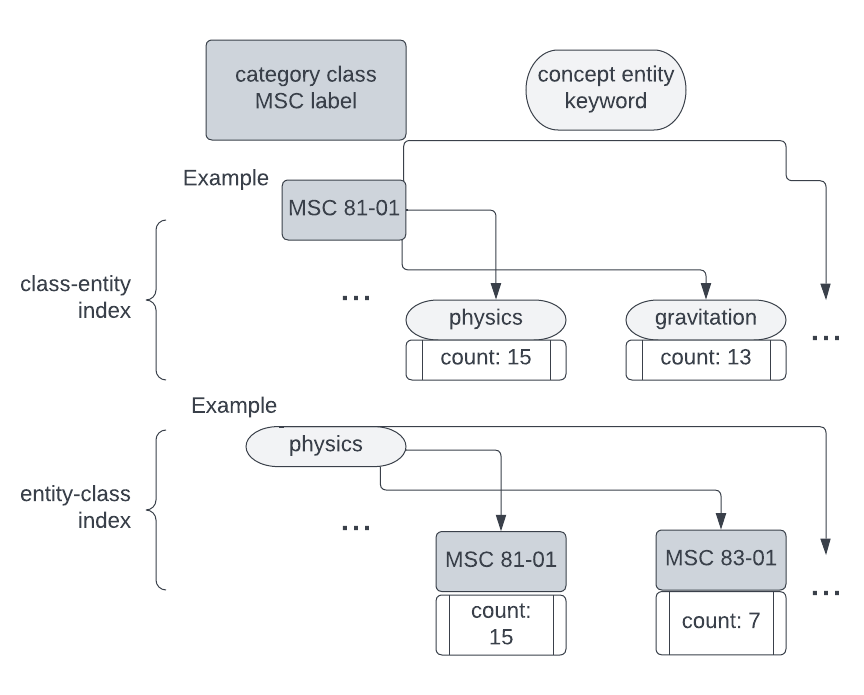

In [ ]:
# 3) Index statistics
print('\nIndex statistics:\n')
src.evaluate_classification_notebook.print_index_statistics(indexes)


Index statistics:


Stats of index msc_keyword_idx.json
Average entry per key count: 3017.5296635183
Average entry per key entropy: 6.313690770463714

Stats of index keyword_msc_idx.json
Average entry per key count: 6.165055007280132
Average entry per key entropy: 1.183499518839772

Stats of index msc_refs_idx.json
Average entry per key count: 986.2427810485001
Average entry per key entropy: 4.956037278385041

Stats of index refs_msc_idx.json
Average entry per key count: 1071.558939993908
Average entry per key entropy: 5.270785341844102




0

### Load test data and generate predictions
4) To evaluate the classification model, we first load the test data ('out-mr.csv') into a Pandas DataFrame. The test dataset is publicly available at https://zenodo.org/record/5884600.
5) Next, we generate predictions of fine-grained msc labels from text ('predict_text_mscs'), keywords ('predict_keyword_mscs'), and references ('predict_reference_mscs'). Therefore, we employ the mapping indexes. [As the prediction is computationally expensive, the progress (percentage) is printed out while the user is waiting.]

In [ ]:
# 4) Load test table
print('\nLoad test table...\n')
test_table = pd.read_csv('data/out-mr.csv', delimiter=',')
print('done')


Load test table...

done


In [ ]:
# 5) Predict MSCs
print('\nPredict MSCs...\n')
print('Predict from text...')
src.evaluate_classification_notebook.predict_text_mscs(test_table,indexes)
print('Predict from keywords...')
src.evaluate_classification_notebook.predict_keyword_mscs(test_table,indexes)
print('Predict from references...')
src.evaluate_classification_notebook.predict_reference_mscs(test_table,indexes)


Predict MSCs...

Predict from text...
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
Save prediction table...
Overlap: 0.15877746905784293
Predict from keywords...
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
Save prediction table...
Predict from references...
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
Save prediction table...


### Evaluate predictions and get precision-recall curves
6) We evaluate the ranked msc classification prediction using the normalized Discounted Cumulative Gain (nDCG) ranking measure. Therefore, we compare the predictions to a human baseline ('MR-MSCs' for keywords and 'References-MSCs' for references). The baseline 'Mathematics Subject Classification inter-rater agreement' dataset (MR) is publicly available at https://zenodo.org/record/5884600.
7) Finally, the precision recall curves (ROC: Receiver Operator Curve) are generated and plotted for predictions based on (abstract) text, keywords, and references in comparison to the human annotator baseline. The prediction cutoff (number of predicted msc) is varied from 0 (upper left) to 10 (lower right).


In [ ]:
# 6) Evaluate MSC predictions
print('\nEvaluate MSC predictions...\n')
# Compare to MR-MSCs and References-MSCs
src.evaluate_classification_notebook.compare_mr_keyword_refs_dcgs(test_table)


Evaluate MSC predictions...

Load data
Get DCGs
Matching mscs/mrmscs: 100.0%
Score eval
mean_nDCG_zbmath: 0.5872075037608373
mean_nDCG_keywords: 0.5760441685087603
mean_nDCG_refs: 0.21992068720743763
mean_nDCG_keywords_and_refs: 0.209662616360812
mean_nDCG_keywords_or_refs: 0.4135395092347533



Get precision-recall curves...
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


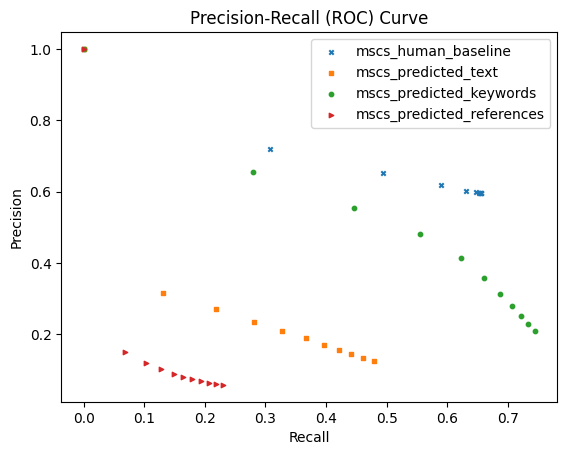

In [ ]:
# 7) Get precision-recall curves
print('\nGet precision-recall curves...')
src.evaluate_classification_notebook.get_precision_recall_curves()

## Explainability

Using the entity-class index, it is possible to trace back the exact prediction entity source for each predicted class label. This can help both to explain semi-supervised suggestions to human annotators and to understand the bottlenecks of the model in the performance evaluation.

To try out a demo of the MSC prediction from (abstract) text or keyword entities, you can run the streamlit user interface with the script 'run_viewer.py' or use the deployed version provided at https://automscexplainer.formulasearchengine.com
The figure below shows a screenshot of the explainer demo UI.
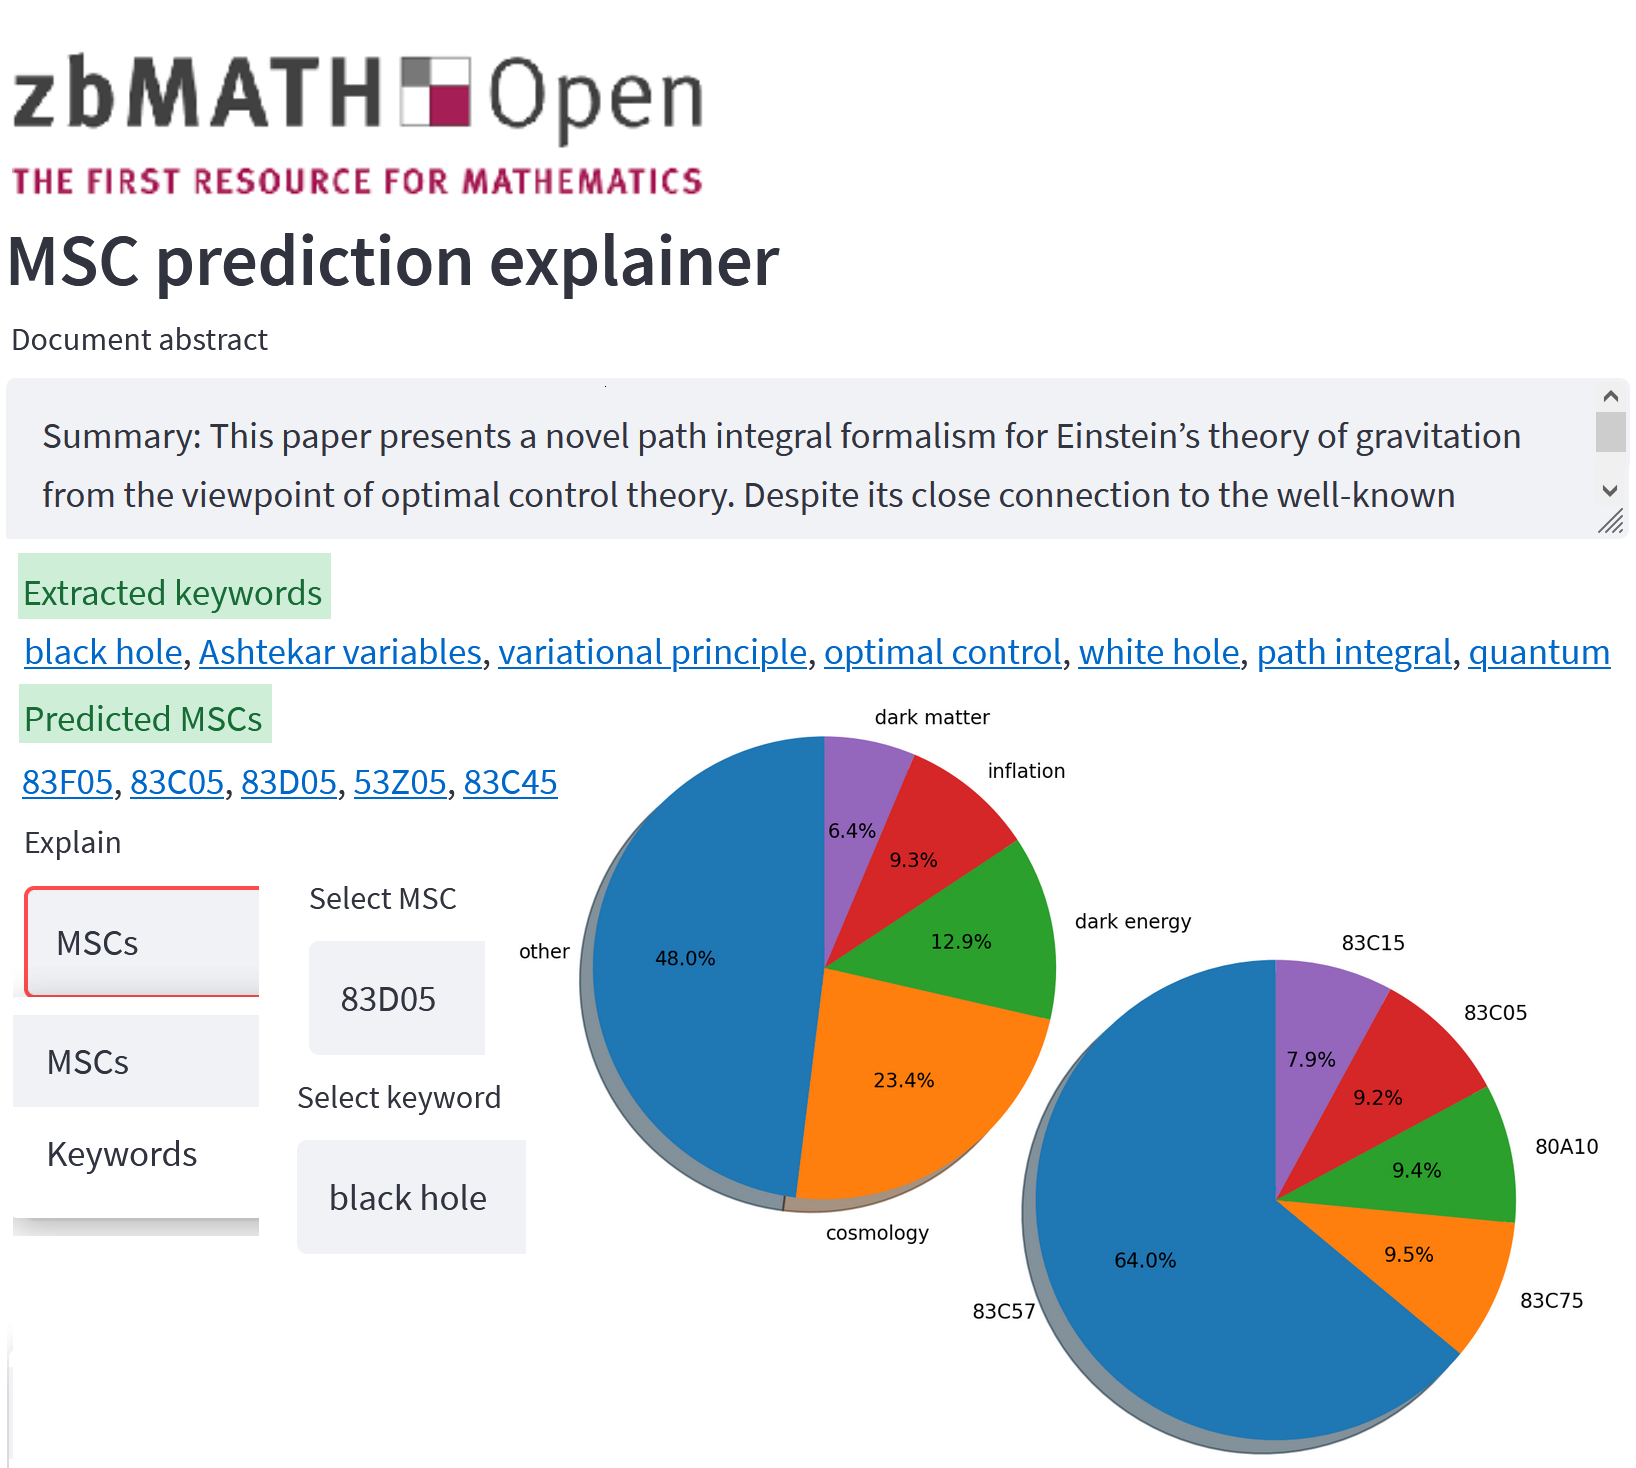

## Conclusion

In this evaluation, we show that using the relations between mathematical concept entities and category classes in mathematical documents can enable fine-grained mathematical subject class category (MSC) predictions. To demonstrate this, we employ a dataset containing 4.4M documents from the zbMATH database, labeled with MSC-keyword correspondences.

The results indicate that the quality of the MSC predictions from keywords is close to the human baseline (inter-reviewer agreement) for a prediction cutoff of up to three MSCs with both precision and recall around 0.5 (F1 measure 0.5). The prediction from text achieves lower scores. This could be attributed to the fact that the abstract text contains a larger number of keywords, introducing entropy.

In summary, we find that there is great potential in exploring the relationships between category classes and concept entities both to address fine-grained classification with data sparsity and to provide high classification explainability.
